# Assumptions:
- Each question in the sub_trait category is highly correlated with the trait. 


- We ignore the difference among sub_traits in each trait. The weight of each question does not depend on the sub_trait category. (e.g. the Self-concept, self-esteem and self-efficacy are composing the trait -- self-awareness indistinguishably)


- Everyone is honest and has the ability to describe themselves. 


- Better personality is desirable. For most questions, higher scores represent a better personality; for four questions (SR4, SR8, EMP3, EMP10), lower scores represent a better personality. For several questions, there is no directional relationship between score and desirability. They are MOT7, MOT8, MOT9 and SK5. 


- Based on the assumptions above, if the mode of scores of one question is lower than the mode of scores of other questions, the question with a low mode should be assigned with a higher weight. 

# read data

In [ ]:
import pandas as pd

In [165]:
BEQI = pd.read_csv("BEQI (active 4-9-19) - BII_EQ_V1.csv")
BEQI.head()

,PROJECT_CODE,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SR1,...,AREA_STUDY,STAGE,INDUSTRY,AFFILIATION,RESP_LEVEL,NUM_EMP,COUNTRY,EMAIL,Submitted At,Token
0,test,4,NaN,NaN,5,4,3,4,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/18/2018 20:59:10,2d3277e13df7890e0a1143edc8911a6f
1,test,4,NaN,NaN,5,4,4,3,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/21/2018 19:20:31,307de4fc1b46b47491a80bff76a0c5fc
2,test,4,NaN,NaN,5,5,3,2,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/22/2018 3:27:19,01d3821820063c084aab7c64132cabfe
3,FREE,3,NaN,NaN,4,3,4,3,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/24/2018 9:25:02,5bd95e02e8e909104337da2615341200
4,FREE,5,NaN,NaN,3,4,4,2,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/26/2018 5:11:00,5aecff1663c679e599cd79619966ca7f


In [39]:
BEQI.shape

(223, 63)

In [49]:
BEQI.tail()

,PROJECT_CODE,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SR1,...,AREA_STUDY,STAGE,INDUSTRY,AFFILIATION,RESP_LEVEL,NUM_EMP,COUNTRY,EMAIL,Submitted At,Token
218,TEST,5,3.0,3.0,3,3,3,4,3.0,4,...,"Science, Technology, Engineering & Mathematics",Still in school,NaN,NaN,NaN,NaN,United States of America (USA),ehcastroh@gmail.com,4/19/2019 9:53:04,6e938201efd00f8548f13bb2d53a47a5
219,FREE,5,4.0,4.0,5,5,4,4,3.0,4,...,"Health, Medical, & Social Sciences/Services",Still in school,NaN,NaN,NaN,NaN,United States of America (USA),jaydenkang@berkeley.edu,5/1/2019 22:42:27,496bceb03abcbfb28bca320b1d583331
220,scet-sum-19,4,3.0,4.0,4,5,4,4,3.0,5,...,"Science, Technology, Engineering & Mathematics",Still in school,NaN,NaN,NaN,NaN,United States of America (USA),srikar@berkeley.edu,6/5/2019 19:54:13,5394c671889f6a5d7341b8218696c3c1
221,scet-sum-19,5,4.0,3.0,2,5,4,4,3.0,5,...,"Science, Technology, Engineering & Mathematics",Still in school,NaN,NaN,NaN,NaN,United States of America (USA),NaN,6/5/2019 20:17:44,f42e8209e75b2625d48696806d7d2f50
222,scet-sum-19,4,4.0,3.0,4,4,3,4,2.0,2,...,"Science, Technology, Engineering & Mathematics",Still in school,NaN,NaN,NaN,NaN,United States of America (USA),clwang@berkeley.edu,6/5/2019 23:07:23,848cb6084deedb1e4a51684d32cb7a1d


In [40]:
EQ = pd.read_csv("BEQI (active 4-9-19) - EQ_Results_V1.csv")
EQ.head()

,PROJECT_CODE,EMAIL,SELF_AWARENESS,SELF_REGULATION,EMPATHY,MOTIVATION,SOCIAL_SKILL,MANAGE_SELF,MANAGE_OTHERS,SCORE
0,TEST,ehcastroh@gmail.com,50.790945,56.438468,57.954383,42.786832,66.259496,60.545447,59.943904,62.074373
1,TEST,ehcastroh@gmail.com,50.790945,56.438468,57.954383,42.786832,66.259496,60.545447,59.943904,62.074373
2,TEST,ehcastroh@gmail.com,50.790945,56.438468,57.954383,42.786832,66.259496,60.545447,59.943904,62.074373
3,TEST,ehcastroh@gmail.com,50.790945,56.438468,57.954383,42.786832,66.259496,60.545447,59.943904,62.074373
4,TEST,ehcastroh@gmail.com,50.790945,56.438468,57.954383,42.786832,66.259496,60.545447,59.943904,62.074373


In [48]:
EQ.tail()

,PROJECT_CODE,EMAIL,SELF_AWARENESS,SELF_REGULATION,EMPATHY,MOTIVATION,SOCIAL_SKILL,MANAGE_SELF,MANAGE_OTHERS,SCORE
214,cogsciEQ-S19,nathan.muldrow@berkeley.edu,100.000000,54.580998,63.692082,49.802306,94.182126,76.290703,85.997945,80.145804
215,cogsciEQ-S19,yli58014@berkeley.edu,40.961877,43.966198,58.276387,45.007606,74.489566,50.126783,58.729487,56.553606
216,cogsciEQ-S19,ivang@berkeley.edu,34.919972,50.064071,36.461077,27.957349,54.958047,46.363340,44.786767,39.987326
217,cogsciEQ-S19,richard1@berkeley.edu,44.158047,50.064071,60.925052,27.957349,54.958047,55.424476,50.138023,49.422547
218,TEST,ehcastroh@gmail.com,44.158047,50.064071,60.925052,27.957349,54.958047,55.424476,50.138023,49.422547


In [41]:
EQ.shape

(219, 10)

# merge data

In [42]:
#data = EQ.merge(BEQI, on=['EMAIL', 'PROJECT_CODE'])

# preprocess special case (lower score -> better personality)

In [160]:
BEQI.columns

Index(['PROJECT_CODE', 'SA1', 'SA2', 'SA3', 'SA4', 'SA5', 'SA6', 'SA7', 'SA8',
       'SR1', 'SR2', 'SR3', 'SR4', 'SR5', 'SR6', 'SR7', 'SR8', 'EMP1', 'EMP2',
       'EMP3', 'EMP4', 'EMP5', 'EMP6', 'EMP7', 'EMP8', 'EMP9', 'EMP10',
       'EMP11', 'EMP12', 'EMP13', 'EMP14', 'MOT1', 'MOT2', 'MOT3', 'MOT4',
       'MOT5', 'MOT6', 'MOT7', 'MOT8', 'MOT9', 'MOT10', 'MOT11', 'SK1', 'SK2',
       'SK3', 'SK4', 'SK5', 'SK6', 'SK7', 'SK8', 'AGE', 'GENDER', 'EDU_LEVEL',
       'AREA_STUDY', 'STAGE', 'INDUSTRY', 'AFFILIATION ', 'RESP_LEVEL',
       'NUM_EMP', 'COUNTRY', 'EMAIL', 'Submitted At', 'Token', 'SA1_norm'],
      dtype='object')

In [161]:
special = ['SR4', 'SR8', 'EMP3', 'EMP10']
BEQI[special] = 6 - BEQI[special]

In [167]:
BEQI[special].head()

,SR4,SR8,EMP3,EMP10
0,4,NaN,4,NaN
1,3,NaN,4,NaN
2,2,NaN,5,NaN
3,3,NaN,3,NaN
4,4,NaN,4,NaN


# plot histogram 

In [150]:
BEQI_sub = BEQI.iloc[:,1:50]

In [152]:
BEQI_sub.head()

,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SR1,SR2,...,MOT10,MOT11,SK1,SK2,SK3,SK4,SK5,SK6,SK7,SK8
0,4,NaN,NaN,5,4,3,4,NaN,4,4,...,NaN,NaN,2,4,4,1,3,NaN,NaN,NaN
1,4,NaN,NaN,5,4,4,3,NaN,4,4,...,NaN,NaN,5,4,5,5,4,NaN,NaN,NaN
2,4,NaN,NaN,5,5,3,2,NaN,4,4,...,NaN,NaN,5,5,5,5,1,NaN,NaN,NaN
3,3,NaN,NaN,4,3,4,3,NaN,4,3,...,NaN,NaN,3,3,3,4,2,NaN,NaN,NaN
4,5,NaN,NaN,3,4,4,2,NaN,4,4,...,NaN,NaN,5,4,3,4,1,NaN,NaN,NaN


In [154]:
import matplotlib.pyplot as plt

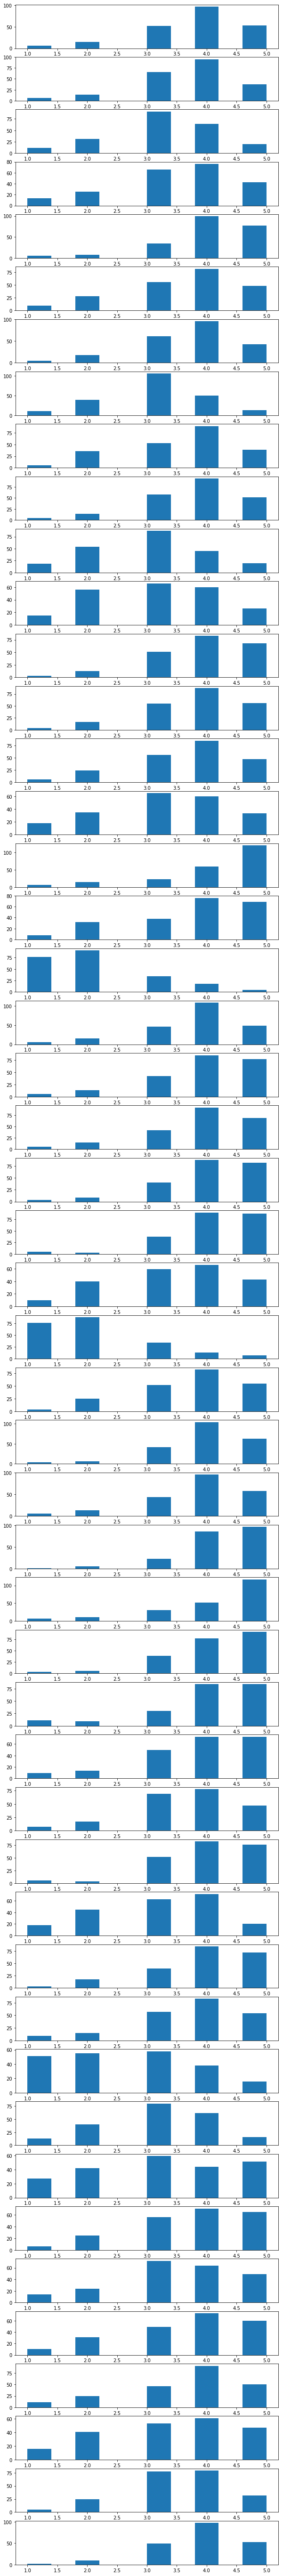

In [153]:
fig, ax = plt.subplots(figsize=(10,100),nrows=49, ncols=1)

for i in range(49):
    ax[i].hist(BEQI_sub.iloc[:,i].dropna())

plt.show()

## use the mode to determine weight

# normalize data

In [156]:
for i in range(BEQI_sub.shape[1]):
    name = BEQI_sub.columns[i]
    BEQI_sub[name+'_norm'] = (BEQI_sub.iloc[:,i] - BEQI_sub.iloc[:,i].mean()) / BEQI_sub.iloc[:,i].std()

In [157]:
BEQI_sub.head()

,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SR1,SR2,...,MOT10_norm,MOT11_norm,SK1_norm,SK2_norm,SK3_norm,SK4_norm,SK5_norm,SK6_norm,SK7_norm,SK8_norm
0,4,NaN,NaN,5,4,3,4,NaN,4,4,...,NaN,NaN,-0.927464,0.244764,0.446647,-2.292909,-0.588800,NaN,NaN,NaN
1,4,NaN,NaN,5,4,4,3,NaN,4,4,...,NaN,NaN,1.345332,0.244764,1.328084,1.185450,0.323022,NaN,NaN,NaN
2,4,NaN,NaN,5,5,3,2,NaN,4,4,...,NaN,NaN,1.345332,1.169887,1.328084,1.185450,-2.412443,NaN,NaN,NaN
3,3,NaN,NaN,4,3,4,3,NaN,4,3,...,NaN,NaN,-0.169865,-0.680360,-0.434789,0.315860,-1.500621,NaN,NaN,NaN
4,5,NaN,NaN,3,4,4,2,NaN,4,4,...,NaN,NaN,1.345332,0.244764,-0.434789,0.315860,-2.412443,NaN,NaN,NaN


# calculate modes of each question

In [105]:
mode = BEQI_sub.iloc[:,:49].mode()

In [106]:
mode

,SA1,SA2,SA3,SA4,SA5,SA6,SA7,SA8,SR1,SR2,...,MOT10,MOT11,SK1,SK2,SK3,SK4,SK5,SK6,SK7,SK8
0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,...,3.0,3.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# take mean if there are multiple modes

In [117]:
for i in range(0,49):
    if mode.iloc[:,i].count() > 1:
        mode.iloc[:,i] = mode.iloc[:,i].mean()
        print(mode.columns[i])

MOT3
MOT4


# remove the second row

In [122]:
mode = mode.iloc[0]

In [113]:
mode.columns

Index(['SA1', 'SA2', 'SA3', 'SA4', 'SA5', 'SA6', 'SA7', 'SA8', 'SR1', 'SR2',
       'SR3', 'SR4', 'SR5', 'SR6', 'SR7', 'SR8', 'EMP1', 'EMP2', 'EMP3',
       'EMP4', 'EMP5', 'EMP6', 'EMP7', 'EMP8', 'EMP9', 'EMP10', 'EMP11',
       'EMP12', 'EMP13', 'EMP14', 'MOT1', 'MOT2', 'MOT3', 'MOT4', 'MOT5',
       'MOT6', 'MOT7', 'MOT8', 'MOT9', 'MOT10', 'MOT11', 'SK1', 'SK2', 'SK3',
       'SK4', 'SK5', 'SK6', 'SK7', 'SK8'],
      dtype='object')

# filter the questions in the same category

In [ ]:
SA = [col for col in mode if col.startswith('SA')]
mode[SA]

# calculate weights

In [128]:
weight = 6 - mode

In [135]:
weight = weight.rename('weight').reset_index()

# add category column

In [142]:
import re

In [144]:
category = []
for i in range(weight.shape[0]):
    category.append(re.split('(\d+)',weight['index'][i])[0])

In [146]:
weight['category'] = category

In [158]:
weight.head()

,index,weight,category
0,SA1,2.0,SA
1,SA2,2.0,SA
2,SA3,3.0,SA
3,SA4,2.0,SA
4,SA5,2.0,SA
